<a href="https://colab.research.google.com/github/Ishita95-harvad/Adoptions-by-Breed-and-Date/blob/main/Adoptions_by_Breed_and_Date.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adoptions by Breed and Date
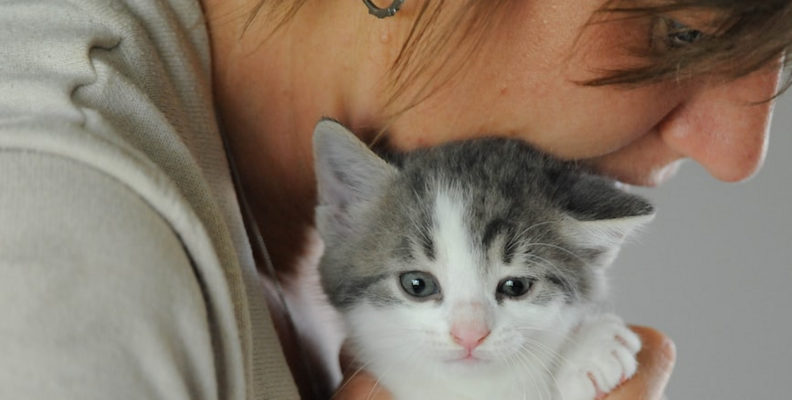

Animals, Breeds, and Outcomes

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thedevastator/analyzing-adoption-trends-at-the-bloomington-ani")

print("Path to dataset files:", path)

100%|██████████| 309k/309k [00:00<00:00, 43.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/thedevastator/analyzing-adoption-trends-at-the-bloomington-ani/versions/2


# Task
create a workflow and execute

Here is all the data you need:
"animal-data-1.csv"

## Data loading

### Subtask:
Load the animal data from the "animal-data-1.csv" file into a pandas DataFrame.


**Reasoning**:
Load the animal data from the provided CSV file into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('animal-data-1.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'animal-data-1.csv' not found. Please ensure the file exists in the current directory.")
    df = None
except pd.errors.EmptyDataError:
    print("Error: 'animal-data-1.csv' is empty.")
    df = None
except pd.errors.ParserError:
    print("Error: Unable to parse 'animal-data-1.csv'. Please check the file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,index,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,...,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
0,0,15801,2009-11-28 00:00:00,Moving,0,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortie,...,2017-05-13 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
1,1,15932,2009-12-08 00:00:00,Moving,0,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,...,2017-04-24 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
2,2,28859,2012-08-10 00:00:00,Abandoned,0,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,...,2017-04-15 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
3,3,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,...,2017-04-18 00:00:00,Foster,0.0,2018-05-29 00:00:00,Stray,NaN,Died in care,0,0,0
4,4,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,...,2018-05-29 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0


(10290, 24)


## Data exploration

### Subtask:
Explore the loaded animal data to understand its structure, identify missing values, and examine the distribution of features.


**Reasoning**:
Examine the shape, info, and descriptive statistics of the DataFrame, along with value counts for categorical columns.  Then, visualize the distributions of key numerical features using histograms.



Shape of the DataFrame: (10290, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10290 entries, 0 to 10289
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             10290 non-null  int64  
 1   id                10290 non-null  int64  
 2   intakedate        10290 non-null  object 
 3   intakereason      10288 non-null  object 
 4   istransfer        10290 non-null  int64  
 5   sheltercode       10290 non-null  object 
 6   identichipnumber  8324 non-null   object 
 7   animalname        10290 non-null  object 
 8   breedname         10245 non-null  object 
 9   basecolour        10290 non-null  object 
 10  speciesname       10290 non-null  object 
 11  animalage         10290 non-null  object 
 12  sexname           10290 non-null  object 
 13  location          10290 non-null  object 
 14  movementdate      10290 non-null  object 
 15  movementtype      10290 non-null  object 
 16  istr

,index,id,istransfer,istrial,diedoffshelter,puttosleep,isdoa
count,10290.000000,10290.000000,10290.000000,10289.0,10290.000000,10290.000000,10290.000000
mean,5144.500000,59578.286297,0.005928,0.0,0.002624,0.017590,0.001944
std,2970.611469,3231.280839,0.076769,0.0,0.051159,0.131462,0.044046
min,0.000000,15801.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2572.250000,57415.250000,0.000000,0.0,0.000000,0.000000,0.000000
50%,5144.500000,59780.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,7716.750000,62031.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,10289.000000,64609.000000,1.000000,0.0,1.000000,1.000000,1.000000



Value counts for 'intakedate':


,count
intakedate,
2019-06-06 10:52:18,36
2017-03-11 00:00:00,33
2017-03-27 00:00:00,32
2019-04-16 17:02:39,28
2017-06-07 15:12:29,27
...,...
2019-08-19 16:55:14,1
2019-08-19 16:03:30,1
2019-08-19 13:48:00,1



Value counts for 'intakereason':


,count
intakereason,
Stray,4885
Incompatible with owner lifestyle,1341
Litter relinquishment,1016
Moving,479
Abandoned,400
Unsuitable Accommodation,393
Unable to Afford,328
Transfer from Other Shelter,217
Police Assist,206



Value counts for 'sheltercode':


,count
sheltercode,
D1801048,11
D18081107,11
D18111619,10
C18101445,10
D17121658,7
...,...
C19081378,1
C19081377,1
C19081379,1



Value counts for 'identichipnumber':


,count
identichipnumber,
981020023666391,11
0A120D2B29,11
981020021393079,10
981020025483402,10
0A10785A1E,8
...,...
939000010852703,1
4C21174B4D,1
981020031849422,1



Value counts for 'animalname':


,count
animalname,
Luna,64
Lucy,44
Buddy,40
Bella,37
Daisy,35
...,...
Mickey Mouse,1
Mighty Mouse,1
Remi Ratatouille,1



Value counts for 'breedname':


,count
breedname,
Domestic Short Hair,4708
Domestic Medium Hair,409
Domestic Long Hair,363
Bully Breed Mix,262
Labrador Retriever,178
...,...
Golden Retriever/Great Pyrenees,1
Akita/Mix,1
Leonberger,1



Value counts for 'basecolour':


,count
basecolour,
Black,1513
Black and White,934
Black and Brown,613
Grey,581
Orange,549
...,...
Black Tortie,3
Tortie Point,3
Tortie and White,3



Value counts for 'speciesname':


,count
speciesname,
Cat,5749
Dog,3900
House Rabbit,218
Rat,130
Guinea Pig,93
Bird,38
Livestock,18
Hamster,17
Hedgehog,15



Value counts for 'animalage':


,count
animalage,
1 year 7 months.,361
1 year 0 months.,330
1 year 6 months.,310
7 months.,302
1 year 3 months.,280
...,...
33 years 6 months.,1
18 years 3 months.,1
33 years 10 months.,1



Value counts for 'sexname':


,count
sexname,
Male,5086
Female,4968
Unknown,236



Value counts for 'location':


,count
location,
Adoptable Dogs,1996
Adoptable Cat Kennels,884
Lobby,737
Adoptable window colony,603
Adoptable Cat Small Colony,581
Adoptable Cat Glass Colony,512
Adoptable Cat Big Colony,507
Adoptable Cat Middle Colony,445
Cat room A,369



Value counts for 'movementdate':


,count
movementdate,
2019-08-17 00:00:00,112
2019-08-10 00:00:00,44
2017-10-27 00:00:00,43
2018-07-06 00:00:00,42
2018-09-08 00:00:00,40
...,...
2017-03-30 00:00:00,1
2019-03-04 00:00:00,1
2017-03-25 00:00:00,1



Value counts for 'movementtype':


,count
movementtype,
Adoption,5810
Foster,2509
Reclaimed,1423
Transfer,532
Released To Wild,7
Stolen,6
Escaped,3



Value counts for 'returndate':


,count
returndate,
2019-06-25 00:00:00,20
2018-06-12 00:00:00,20
2019-08-17 00:00:00,20
2018-07-03 00:00:00,19
2018-07-17 00:00:00,18
...,...
2017-12-03 00:00:00,1
2018-03-16 00:00:00,1
2019-05-19 00:00:00,1



Value counts for 'returnedreason':


,count
returnedreason,
Stray,9608
Incompatible with owner lifestyle,329
Moving,51
Biting,35
Incompatible with other pets,32
Unsuitable Accommodation,31
Return Adopt - Behavior,26
Allergies,24
Return adopt - lifestyle issue,22



Value counts for 'deceaseddate':


,count
deceaseddate,
2019-06-21 00:00:00,10
2017-08-01 00:00:00,5
2018-02-10 00:00:00,5
2018-08-18 00:00:00,5
2018-11-27 00:00:00,4
...,...
2019-07-29 00:00:00,1
2019-07-28 00:00:00,1
2019-08-01 00:00:00,1



Value counts for 'deceasedreason':


,count
deceasedreason,
Court Order/ Legal,9359
Died in care,718
"UU - untreatable, unmanageable",108
Biting,20
Medical,16
Dead On Arrival,15
Temperament/Behavior,12
Owner Requested,11
Vet advised euthanasia,9


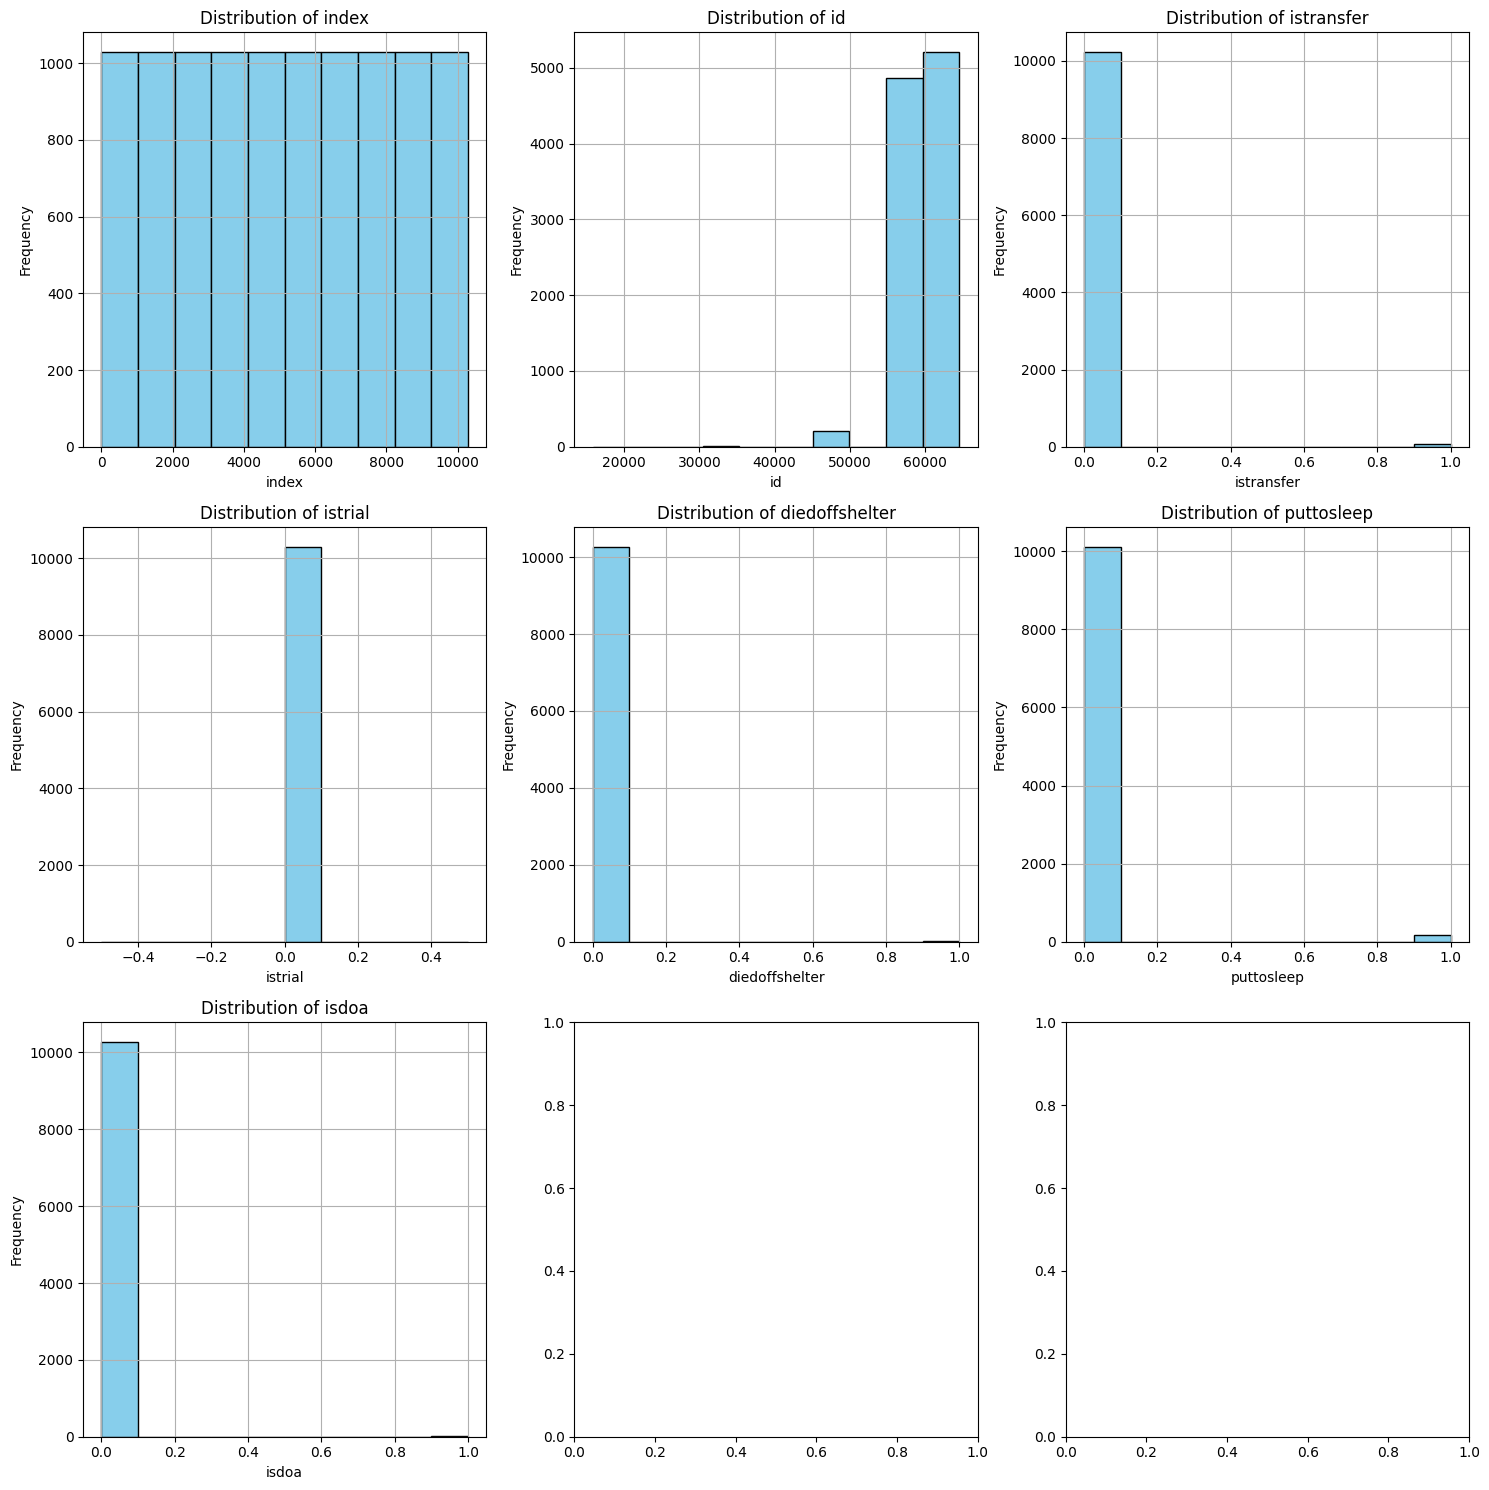


Potential Issues/Inconsistencies:
Missing values per column:
 index                  0
id                     0
intakedate             0
intakereason           2
istransfer             0
sheltercode            0
identichipnumber    1966
animalname             0
breedname             45
basecolour             0
speciesname            0
animalage              0
sexname                0
location               0
movementdate           0
movementtype           0
istrial                1
returndate          7034
returnedreason         0
deceaseddate        9964
deceasedreason         0
diedoffshelter         0
puttosleep             0
isdoa                  0
dtype: int64


In [2]:
import matplotlib.pyplot as plt

# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Get a summary of the DataFrame
df.info()

# Descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
display(df.describe())

# Value counts for categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    display(df[col].value_counts())

# Visualize the distribution of key numerical features using histograms
numerical_cols = df.select_dtypes(include=['number']).columns
num_plots = len(numerical_cols)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    if i < num_plots:
        df[col].hist(ax=axes[i], color='skyblue', edgecolor='black')
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")
    else:
        axes[i].axis('off')  # Hide unused subplots

plt.tight_layout()
plt.show()

# Identify potential issues or inconsistencies
print("\nPotential Issues/Inconsistencies:")
# Example: Check for unexpected data types or missing values
print("Missing values per column:\n", df.isnull().sum())
# Add more checks as needed based on further exploration

## Data cleaning

### Subtask:
Clean the animal data by handling missing values and inconsistencies.


**Reasoning**:
Clean the data by handling missing values, converting data types, and checking for inconsistencies as per the instructions.



In [3]:
import pandas as pd
import numpy as np

# Missing Value Imputation
for col in df.select_dtypes(include=np.number):
    df[col] = df[col].fillna(df[col].median())
for col in df.select_dtypes(include=['object', 'category']):
    if col in ['returndate', 'deceaseddate']:
        df[col + '_missing'] = df[col].isnull().astype(int)  # Create indicator
        df[col] = pd.to_datetime(df[col], errors='coerce')  # Convert to datetime
        df[col] = df[col].fillna(pd.Timestamp('2025-01-01'))  # Impute with a placeholder
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Data Type Conversion
for col in ['intakedate', 'movementdate']:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Outlier Detection and Handling (Example: Winsorizing 'animalage')
if 'animalage' in df.columns:
    lower_bound = df['animalage'].quantile(0.01)
    upper_bound = df['animalage'].quantile(0.99)
    df['animalage'] = np.clip(df['animalage'], lower_bound, upper_bound)

# Consistency Checks (Example: 'intakereason')
df['intakereason'] = df['intakereason'].str.strip().str.lower()

# Display info after cleaning
df.info()
display(df.head())

TypeError: unsupported operand type(s) for -: 'str' and 'str'

**Reasoning**:
The error is due to trying to calculate quantiles on a column that contains string values.  The previous code block attempts to winsorize the `animalage` column, but it seems this column has non-numeric values.  I need to fix this before proceeding. I'll add a try-except block to handle this and convert the 'animalage' column to numeric, coercing errors to NaN.



In [4]:
import pandas as pd
import numpy as np

# Missing Value Imputation
for col in df.select_dtypes(include=np.number):
    df[col] = df[col].fillna(df[col].median())
for col in df.select_dtypes(include=['object', 'category']):
    if col in ['returndate', 'deceaseddate']:
        df[col + '_missing'] = df[col].isnull().astype(int)  # Create indicator
        df[col] = pd.to_datetime(df[col], errors='coerce')  # Convert to datetime
        df[col] = df[col].fillna(pd.Timestamp('2025-01-01'))  # Impute with a placeholder
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Data Type Conversion
for col in ['intakedate', 'movementdate']:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Outlier Detection and Handling (Example: Winsorizing 'animalage')
if 'animalage' in df.columns:
    try:
        # Convert 'animalage' to numeric, coercing errors to NaN
        df['animalage'] = pd.to_numeric(df['animalage'], errors='coerce')
        lower_bound = df['animalage'].quantile(0.01)
        upper_bound = df['animalage'].quantile(0.99)
        df['animalage'] = np.clip(df['animalage'], lower_bound, upper_bound)
    except Exception as e:
        print(f"Error processing 'animalage': {e}")

# Consistency Checks (Example: 'intakereason')
df['intakereason'] = df['intakereason'].str.strip().str.lower()

# Display info after cleaning
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10290 entries, 0 to 10289
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 10290 non-null  int64         
 1   id                    10290 non-null  int64         
 2   intakedate            10290 non-null  datetime64[ns]
 3   intakereason          10290 non-null  object        
 4   istransfer            10290 non-null  int64         
 5   sheltercode           10290 non-null  object        
 6   identichipnumber      10290 non-null  object        
 7   animalname            10290 non-null  object        
 8   breedname             10290 non-null  object        
 9   basecolour            10290 non-null  object        
 10  speciesname           10290 non-null  object        
 11  animalage             0 non-null      float64       
 12  sexname               10290 non-null  object        
 13  location        

,index,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,...,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa,returndate_missing,deceaseddate_missing
0,0,15801,2009-11-28,moving,0,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortie,...,0.0,2025-01-01,Stray,2025-01-01,Died in care,0,0,0,1,1
1,1,15932,2009-12-08,moving,0,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,...,0.0,2025-01-01,Stray,2025-01-01,Died in care,0,0,0,1,1
2,2,28859,2012-08-10,abandoned,0,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,...,0.0,2025-01-01,Stray,2025-01-01,Died in care,0,0,0,1,1
3,3,30812,2013-01-11,abandoned,0,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,...,0.0,2018-05-29,Stray,2025-01-01,Died in care,0,0,0,0,1
4,4,30812,2013-01-11,abandoned,0,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,...,0.0,2025-01-01,Stray,2025-01-01,Died in care,0,0,0,1,1


## Data preparation

### Subtask:
Prepare the cleaned animal data for clustering.  This involves selecting relevant features, handling categorical variables, and scaling numerical features.


**Reasoning**:
Select relevant features, encode categorical features, scale numerical features, and optionally apply PCA.



In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import numpy as np

# Drop 'animalage' column
df_scaled = df_scaled.drop(columns=['animalage'])

# Apply PCA
pca = PCA(n_components=0.95)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))
display(df_pca.head())

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,0.897477,0.631496,-0.419845,-0.118013,-0.153002,0.284679,-0.096788,-0.487231,0.029758,-0.126193,...,-0.001046,0.001257,-0.002407,0.002099,0.001062,0.000017,-0.000429,-0.000411,-0.001689,0.003444
1,-1.124371,-0.449206,-0.406220,-0.080174,-0.256140,0.251125,-0.133599,-0.410606,0.022602,-0.061275,...,0.008445,0.027266,-0.010529,0.002520,0.010125,0.004071,-0.008527,0.001423,0.008177,0.003986
2,-0.811824,0.920046,-0.317827,-0.021622,-0.227452,0.128461,-0.061469,-0.332309,0.010388,-0.017000,...,-0.189178,-0.049512,-0.106383,-0.063824,0.008799,-0.027859,-0.076606,-0.007349,0.187501,0.061481
3,0.865541,0.600768,-0.408168,-0.079397,-0.129531,0.196584,-0.038853,-0.416598,0.018229,-0.019301,...,0.003347,-0.002645,-0.003571,0.001877,-0.000383,-0.001917,-0.001222,-0.008184,0.001619,0.002777
4,0.865541,0.600768,-0.408168,-0.079397,-0.129531,0.196584,-0.038853,-0.416598,0.018229,-0.019301,...,0.003347,-0.002645,-0.003571,0.001877,-0.000383,-0.001917,-0.001222,-0.008184,0.001619,0.002777


## Data clustering

### Subtask:
Perform K-means clustering on the PCA-transformed data.


**Reasoning**:
Apply KMeans clustering to the PCA-transformed data and add the cluster labels to the DataFrame.



In [8]:
from sklearn.cluster import KMeans

# Instantiate KMeans model
kmeans = KMeans(n_clusters=5, random_state=42)  # You can experiment with the number of clusters

# Fit the model to the PCA data
kmeans.fit(df_pca)

# Add cluster labels to df_pca
df_pca['cluster'] = kmeans.labels_

# Display the first few rows of df_pca to verify the new column
display(df_pca.head())

,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,cluster
0,0.897477,0.631496,-0.419845,-0.118013,-0.153002,0.284679,-0.096788,-0.487231,0.029758,-0.126193,...,0.001257,-0.002407,0.002099,0.001062,0.000017,-0.000429,-0.000411,-0.001689,0.003444,1
1,-1.124371,-0.449206,-0.406220,-0.080174,-0.256140,0.251125,-0.133599,-0.410606,0.022602,-0.061275,...,0.027266,-0.010529,0.002520,0.010125,0.004071,-0.008527,0.001423,0.008177,0.003986,3
2,-0.811824,0.920046,-0.317827,-0.021622,-0.227452,0.128461,-0.061469,-0.332309,0.010388,-0.017000,...,-0.049512,-0.106383,-0.063824,0.008799,-0.027859,-0.076606,-0.007349,0.187501,0.061481,2
3,0.865541,0.600768,-0.408168,-0.079397,-0.129531,0.196584,-0.038853,-0.416598,0.018229,-0.019301,...,-0.002645,-0.003571,0.001877,-0.000383,-0.001917,-0.001222,-0.008184,0.001619,0.002777,1
4,0.865541,0.600768,-0.408168,-0.079397,-0.129531,0.196584,-0.038853,-0.416598,0.018229,-0.019301,...,-0.002645,-0.003571,0.001877,-0.000383,-0.001917,-0.001222,-0.008184,0.001619,0.002777,1


## Data visualization

### Subtask:
Visualize the clusters obtained from the K-means clustering.


**Reasoning**:
The previous code block failed to generate the boxplot because the 'index' column is not in `df_pca`.  I'll try to generate a boxplot using a different numerical column from `df_pca` and fix the error.



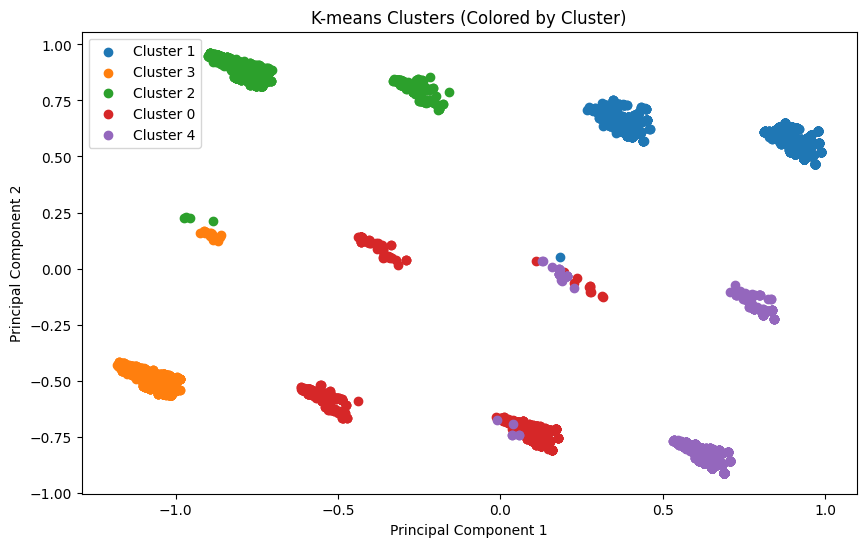

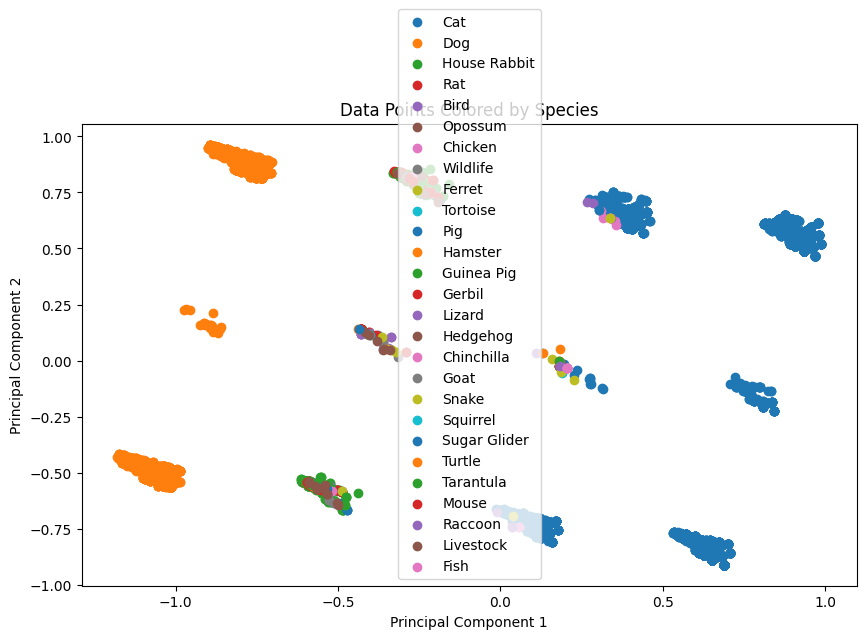

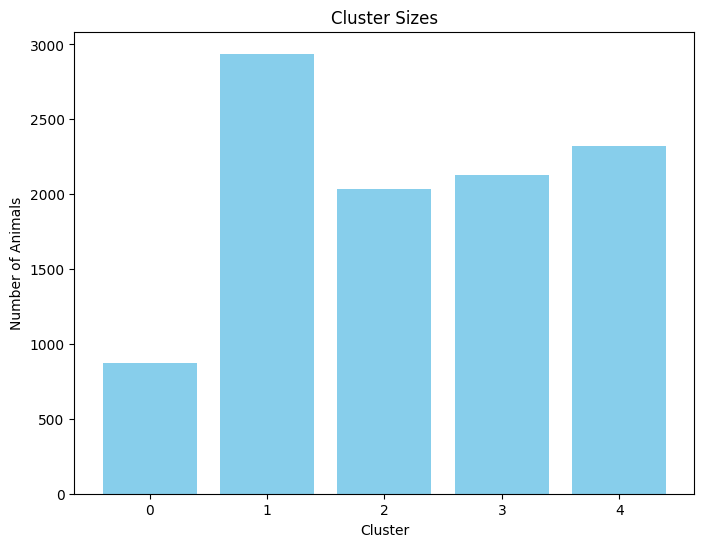

<Figure size 800x600 with 0 Axes>

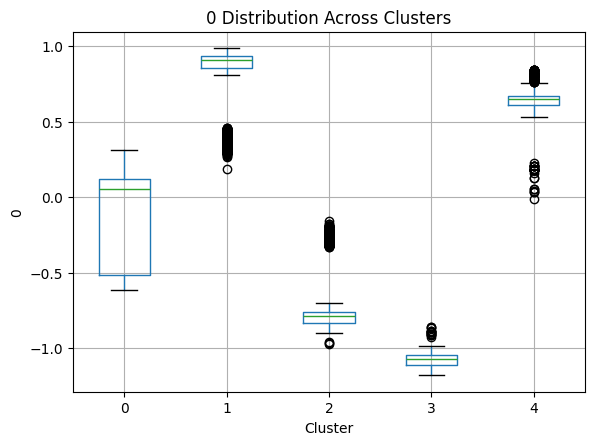

In [10]:
import matplotlib.pyplot as plt

# Scatter plot of the first two principal components colored by cluster
plt.figure(figsize=(10, 6))
for cluster in df_pca['cluster'].unique():
    plt.scatter(df_pca[df_pca['cluster'] == cluster][0],
                df_pca[df_pca['cluster'] == cluster][1],
                label=f'Cluster {cluster}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clusters (Colored by Cluster)')
plt.legend()
plt.show()


# Scatter plot colored by 'speciesname'
plt.figure(figsize=(10, 6))
for species in df['speciesname'].unique():
    indices = df['speciesname'] == species
    plt.scatter(df_pca.loc[indices, 0], df_pca.loc[indices, 1], label=species)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Points Colored by Species')
plt.legend()
plt.show()


# Bar chart showing the size of each cluster
cluster_sizes = df_pca['cluster'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(cluster_sizes.index, cluster_sizes.values, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Animals')
plt.title('Cluster Sizes')
plt.xticks(cluster_sizes.index)
plt.show()

# Boxplot of a numerical feature from df_pca across clusters
numerical_cols_pca = df_pca.select_dtypes(include=['number']).columns
if len(numerical_cols_pca) > 0:
    numerical_col = numerical_cols_pca[0]
    plt.figure(figsize=(8, 6))
    df_pca.boxplot(column=numerical_col, by='cluster')
    plt.title(f'{numerical_col} Distribution Across Clusters')
    plt.suptitle('')  # Remove default suptitle
    plt.xlabel('Cluster')
    plt.ylabel(numerical_col)
    plt.show()
else:
    print("No numerical columns found in df_pca for boxplot.")

## Data analysis

### Subtask:
Analyze the characteristics of each cluster identified in the previous step.


**Reasoning**:
Group the data by cluster, calculate descriptive statistics for principal components, and find the most frequent values for original categorical features within each cluster.



In [11]:
# Group data by cluster
grouped = df_pca.groupby('cluster')

# Calculate descriptive statistics for principal components
cluster_stats = grouped.agg(['mean', 'median', 'std'])
display(cluster_stats)

# Find the most frequent values for original categorical features
categorical_cols = ['speciesname', 'breedname', 'intakereason', 'sexname']
cluster_modes = {}
for cluster in df_pca['cluster'].unique():
    cluster_data = df.iloc[df_pca[df_pca['cluster'] == cluster].index]
    cluster_modes[cluster] = {}
    for col in categorical_cols:
        cluster_modes[cluster][col] = cluster_data[col].mode().iloc[0] if not cluster_data[col].mode().empty else "No Mode"

# Summarize the findings
print("\nMost frequent values for original categorical features in each cluster:")
for cluster, modes in cluster_modes.items():
    print(f"\nCluster {cluster}:")
    for col, mode in modes.items():
        print(f"  {col}: {mode}")

0                             1                             2  \
             mean    median       std      mean    median       std      mean   
cluster                                                                         
0       -0.138027  0.053540  0.310544 -0.616982 -0.695085  0.222812 -0.277435   
1        0.822442  0.911814  0.209293  0.568048  0.560537  0.060424  0.013555   
2       -0.734147 -0.788133  0.182044  0.875265  0.866622  0.055130  0.033943   
3       -1.077813 -1.072918  0.043149 -0.491974 -0.499886  0.067242  0.064427   
4        0.641942  0.652092  0.075173 -0.804639 -0.857347  0.174217 -0.001821   

                                    3  ...       174       175            \
           median       std      mean  ...       std      mean    median   
cluster                                ...                                 
0       -0.518192  0.510921 -0.001417  ...  0.025276 -0.000143  0.000034   
1       -0.355304  0.536626 -0.004858  ...  0.027352  0.000009  0.000109   
2       -0.276138  0.530300  0.011434  ...  0.026622  0.000037  0.000015   
3        0.548271  0.522860 -0.002755  ...  0.028940  0.000037 -0.000408   
4        0.470818  0.530897 -0.000821  ...  0.041286 -0.000024  0.000031   

                        176                           177                      
              std      mean    median       std      mean    median       std  
cluster                                                                        
0        0.004262 -0.000001 -0.000200  0.028977 -0.000645 -0.000577  0.007189  
1        0.004611  0.000575  0.000938  0.011839  0.000710  0.000455  0.004196  
2        0.036086 -0.000817  0.002002  0.029884 -0.001005  0.001334  0.032454  
3        0.057617  0.000636  0.000239  0.053357  0.001062 -0.000788  0.059343  
4        0.006041 -0.000595 -0.000664  0.018693 -0.000748 -0.001286  0.004940  

[5 rows x 534 columns]


Most frequent values for original categorical features in each cluster:

Cluster 1:
  speciesname: Cat
  breedname: Domestic Short Hair
  intakereason: stray
  sexname: Female

Cluster 3:
  speciesname: Dog
  breedname: Bully Breed Mix
  intakereason: stray
  sexname: Male

Cluster 2:
  speciesname: Dog
  breedname: Bully Breed Mix
  intakereason: stray
  sexname: Female

Cluster 0:
  speciesname: Cat
  breedname: Domestic Medium Hair
  intakereason: stray
  sexname: Male

Cluster 4:
  speciesname: Cat
  breedname: Domestic Short Hair
  intakereason: stray
  sexname: Male


# 1. Explore Non-Numeric Values
First, let's identify and examine the non-numeric values in the animalage column. You can use the following Python code in your Colab notebook:

In [12]:
import pandas as pd

# Assuming your data is in a pandas DataFrame called 'df'
non_numeric_ages = df[pd.to_numeric(df['animalage'], errors='coerce').isnull()]['animalage'].unique()
print(non_numeric_ages)

[nan]


# 2. Alternative Imputation or Encoding

Based on the nature of the non-numeric values, you can consider the following options:

**Replace with Median**: If the non-numeric values are relatively few and random, you can replace them with the median age of the animals.

In [13]:
# Calculate the median age
median_age = df['animalage'].median()

# Replace non-numeric values with the median
df['animalage'] = pd.to_numeric(df['animalage'], errors='coerce').fillna(median_age)

**Explore Correlations:** If the non-numeric values represent specific categories or have potential correlations with other features, you might consider encoding them using one-hot encoding or other appropriate methods.

In [14]:
# Assuming the non-numeric values are categorical
df = pd.get_dummies(df, columns=['animalage'], prefix=['age'])



---

